<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/Adrien/labs/05%20-%20Clustering/exercises/solutions/Exercise_Lab05_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exercise 1: Clustering

In this exercise we will look at student grades. We will cluster these grades into a number of groups that fits the data.

First let's read in the data into a Pandas data frame:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
url = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/grades.csv"


grades = pd.read_csv(url, names=['Grades', 'Other']).iloc[:, 0].to_frame()

grades.head()

,Grades
0,1.00
1,20.83
2,47.50
3,50.00
4,50.00


####1. How many observations are in the grades dataframe?

In [3]:
print(f"There are {len(grades)} observations.")

There are 105 observations.


#### 2. Plot a histogram of the Grades series

[Text(0.5, 1.0, 'Histogram of student grades')]

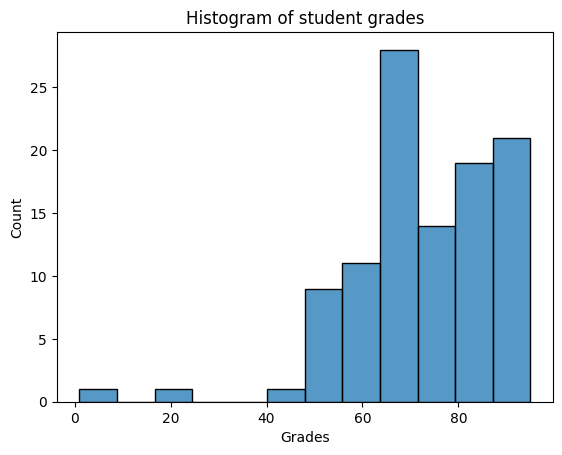

In [4]:
sns.histplot(grades['Grades']).set(title='Histogram of student grades')

#### 3. Plot the grades as a one-dimension scatterplot:

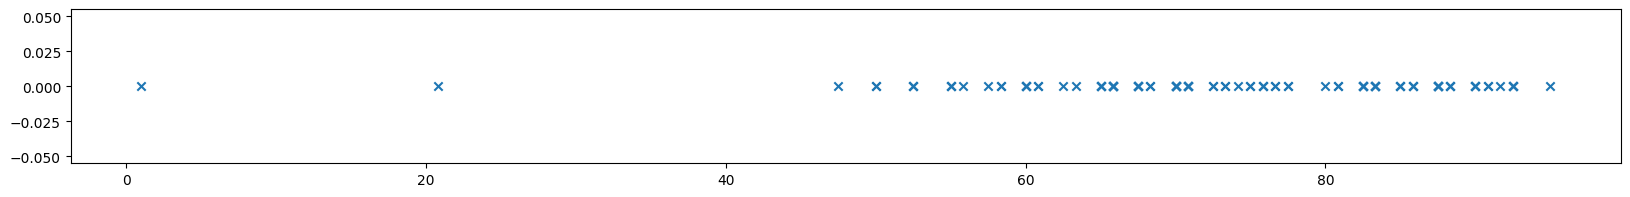

In [5]:
plt.figure(figsize=(20,2))
plt.scatter(grades, np.zeros_like(grades), marker='x')

#### 4. Fit a KMeans algorithm for k=2, random_state=0, as shown in the walkthrough

In [6]:
# create an instace
model2=KMeans(n_clusters=2, random_state=0)

# fit the model on grades
model2.fit(grades)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

#### 5. Print the resulting model labels, the cluster centers and make a one-dimension scatterplot with the grades colored by the cluster they belong to.

In [ ]:
#Print the labels
model2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
#Print the cluster centers
model2.cluster_centers_

array([[61.46415094],
       [84.19769231]])

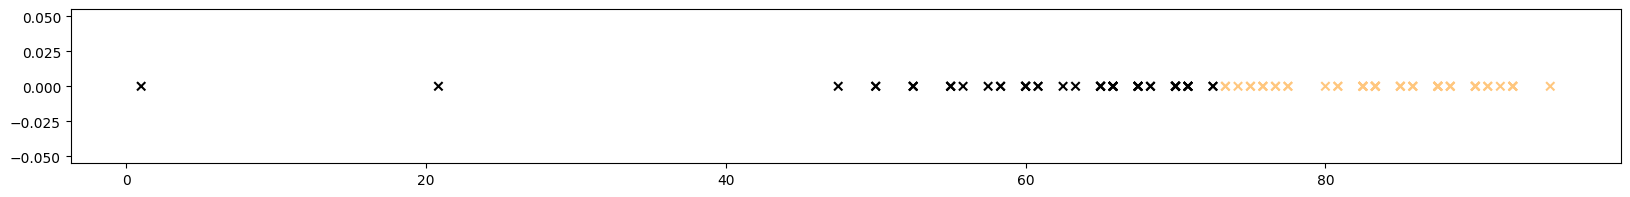

In [ ]:
#One dimension Scatterplot
plt.figure(figsize=(20,2))
plt.scatter(grades, np.zeros_like(grades), marker='x', c=model2.labels_, cmap='copper')

##### Add the cluster centers to your scatterplot above in red

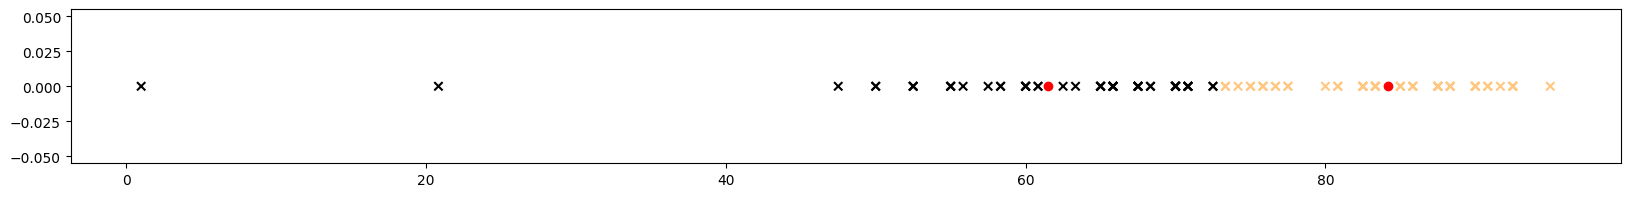

In [ ]:
plt.figure(figsize=(20,2))
plt.scatter(grades, np.zeros_like(grades), marker='x', c=model2.labels_, cmap='copper')
plt.scatter(model2.cluster_centers_, np.zeros_like(model2.cluster_centers_), color='red')

#### 6. Use the elbow method to find the optimal value of k.

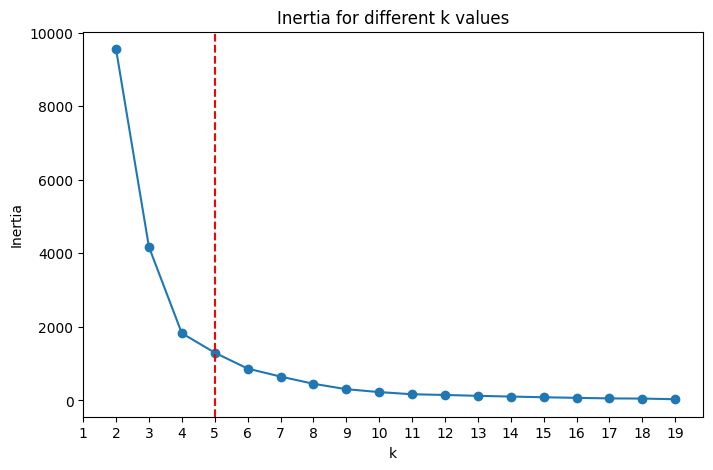

In [8]:
inertia = []
k_values = range(2, 20)
for k in k_values:
  model = KMeans(n_clusters=k, random_state=0, n_init=5)
  model.fit(grades)
  inertia.append(model.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='solid')
plt.title('Inertia for different k values')
plt.ylabel('Inertia')
plt.xlabel('k')
plt.xticks(np.arange(min(k_values)-1, max(k_values)+1, step=1))
plt.axvline(x=5, color='r', linestyle='--')
plt.show()

#### 7. Use an AgglomerativeClustering model, with 4 clusters, euclidean distance and average linkage to partition the grades

In [9]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
clustering.fit(grades)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [16]:
clustering.labels_

array([3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 8. Use the one-dimensional scatter plot to show how the clusters were formed with the hierachical clustering model trained above

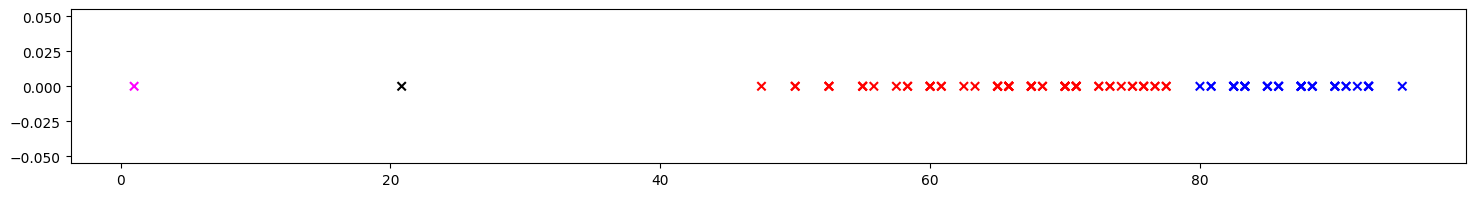

In [24]:
# Plot the grades colored by the labels of the hierarchical model trained above
plt.figure(figsize=(18,2))
colors = ["red", "black", "blue", "magenta"]
plt.scatter(grades, np.zeros_like(grades), marker='x', c=[colors[i] for i in clustering.labels_])

#### 9. Plot the dendrogram for the hierarchical clustering model trained above

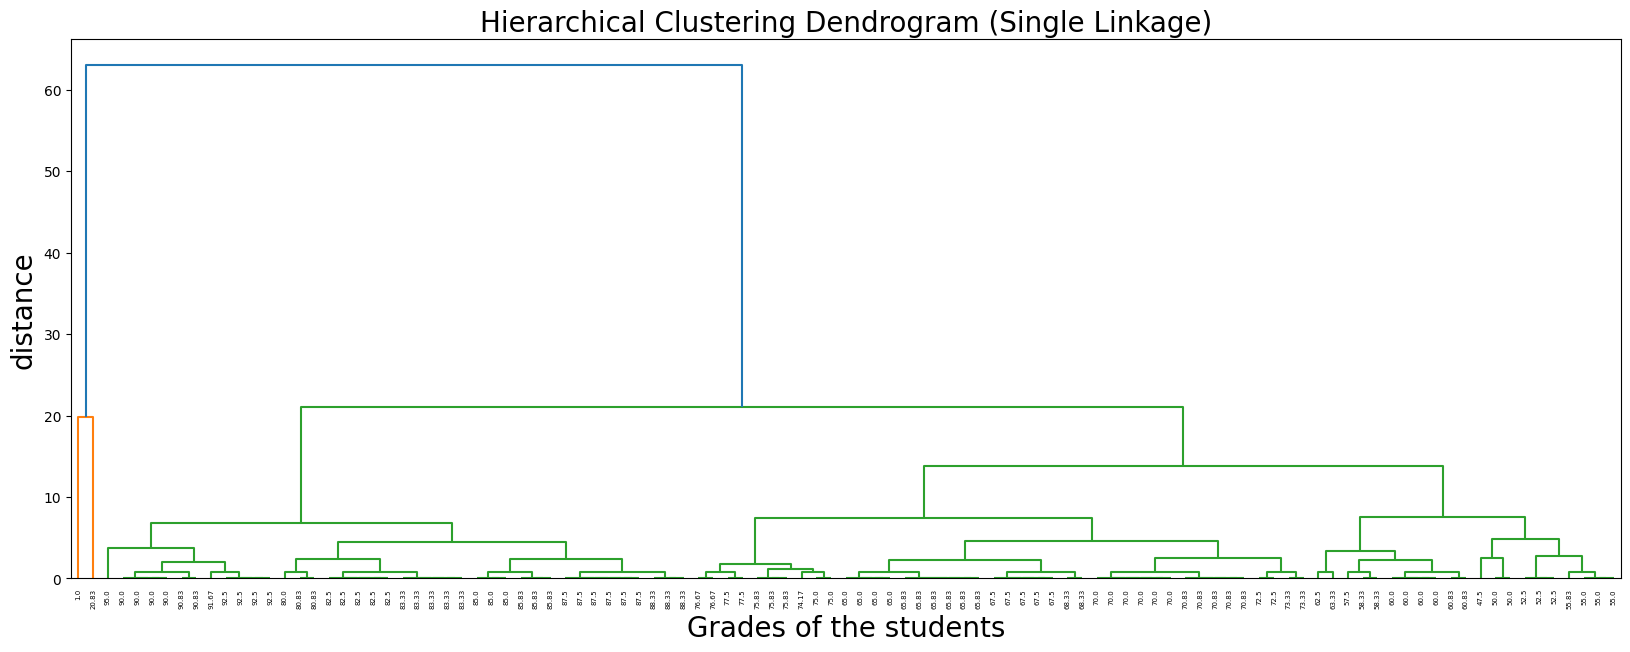

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20, 7))
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)', fontsize=20)
plt.xlabel('Grades of the students', fontsize=20)
plt.ylabel('distance', fontsize=20)

Z = linkage(grades, method='average', metric='euclidean') #Provide the linkage method we want and the chosen distance metric.
dendrogram(Z, labels=np.array(grades).flatten()) #compute the dendogram according the linkage

plt.show()

## Exercise 2

We will work with the same data as in the Walkthrough

> **Replace all the ... with the appropriate value obtained previously (just below each TODO annotation)**

##### QUESTION 2.1 - GET THE DATA USED FOR TRAINING

In [ ]:
# TODO: Get the data from the dataframe of the walkthrough.
# Get the data from the df with the following columns: 'Annual Income (k$)' and 'Age'
df = pd.read_csv("https://github.com/michalis0/Business-Intelligence-and-Analytics/raw/master/data/mall_customers.csv", index_col="CustomerID")
X = df[['Annual Income (k$)' , 'Age']].values

#df = ...(..., index_col="CustomerID")
#X = ...

##### QUESTION 2.2 - TRAIN CLUSTERING WITH UP TO 15 CLUSTERS

In [ ]:
inertia = []
NB_ITER = 15
for n in range(1 , NB_ITER):
    #TODO: Create a KMeans object with the following parameters: n_clusters=n, init='k-means++', n_init=50, max_iter=300, random_state=111
    #algorithm = ...
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=50, max_iter=300, random_state= 111)
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

##### QUESTION 2.3 - PLOT INERTIA AND DETERMINE BEST VALUE OF NB_CLUSTERS

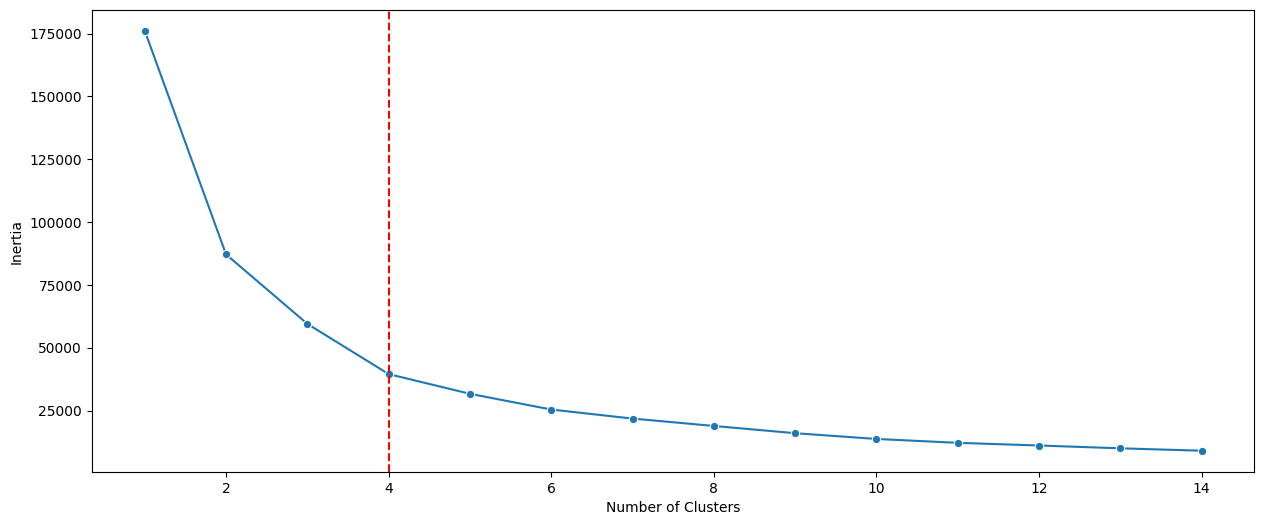

In [ ]:
# Plot vertical line at the point of maximum curvature
plt.figure(1 , figsize = (15 ,6))

# TODO: Plot the inertia values and add a vertical line at the point of maximum curvature you find
#...
sns.lineplot(x = np.arange(1 , NB_ITER), y = inertia, sort = False, marker='o')

# TODO: Add a vertical line at the point of maximum curvature
#...
plt.axvline(x=4, color='r', linestyle='--')

plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
# Replace the ... with the appropriate value obtained previously
#NB_CLUSTERS = ...
NB_CLUSTERS = 4

#### APPLYING K-MEANS

In [ ]:
algorithm = KMeans(n_clusters=NB_CLUSTERS ,init='k-means++', random_state= 111)
algorithm.fit(X)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Print the labels and the centroids
# The labels are the cluster numbers assigned to each data point
print(labels)

[3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3
 3 3 3 1 3 1 3 1 3 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
# Print the centroids coordinates
print(centroids)

[[ 72.95890411  31.95890411]
 [ 51.77777778  55.81481481]
 [106.5         39.        ]
 [ 29.26530612  30.34693878]]


##### QUESTION 2.4 - DO A SCATTER PLOT OF ALL POINTS WITH DIFFERENT COLORS FOR EACH CLUSTER

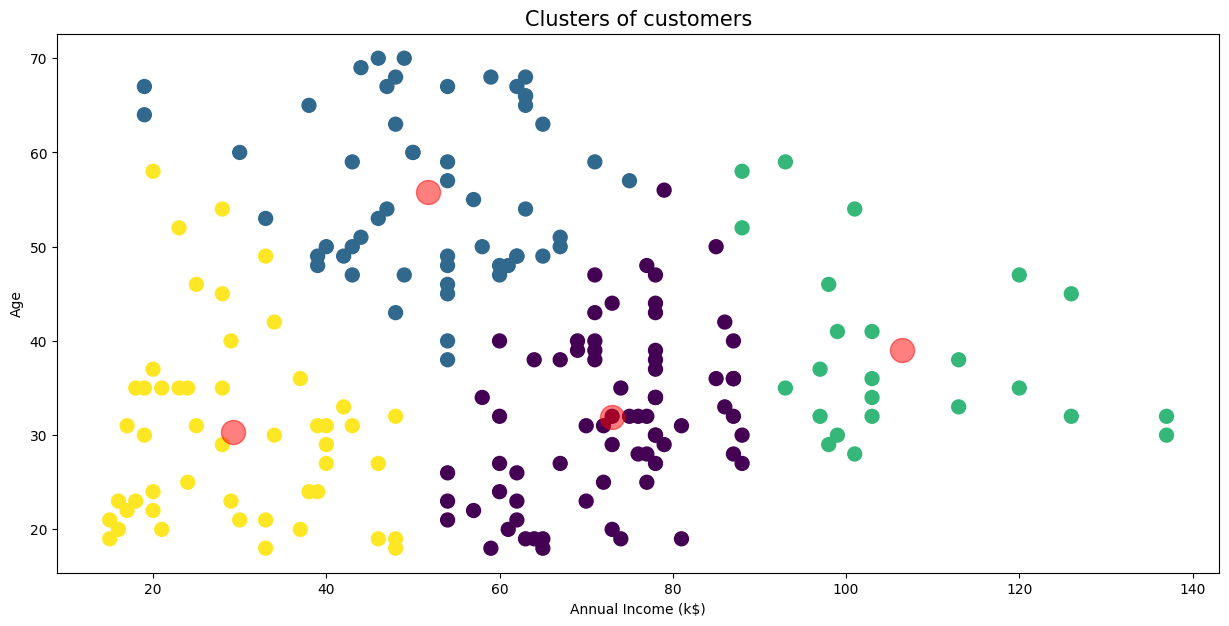

In [ ]:
# Scatter plot with bright colors
plt.figure(1 , figsize = (15 , 7))

# TODO: Use the scatter method of the plt object to plot the data points with the right parameters
#plt.scatter(x =..., y =... , data = df, s=100, c= ...)
plt.scatter(x = 'Annual Income (k$)', y = 'Age', data = df, s = 100, c = algorithm.labels_)

# TODO: Add centroids to the plot with the right parameters
#plt.scatter(x = ... , y = ... , s = 300, c = 'red', alpha = 0.5)
plt.scatter(x = centroids[: , 0], y = centroids[: , 1], s = 300, c = 'red', alpha = 0.5)

plt.title('Clusters of customers', fontsize = 15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

##### QUESTION 2.5 - Predict the cluster of a new point

In [ ]:
new_point = np.array([[50, 68]])

# Predict the cluster of the new point
#new_point_label = ...
new_point_label = algorithm.predict(new_point)
new_point_label

# Display the predicted cluster
print('The new point belongs to cluster number {}'.format(new_point_label[0]))

# Print coordinates of the new point and the centroid of the cluster it belongs to
print('The centroid of the cluster it belongs to is {}'.format(centroids[new_point_label]))

The new point belongs to cluster number 1
The centroid of the cluster it belongs to is [[51.77777778 55.81481481]]


##### QUESTION 2.6 - Show the new_point on the graph

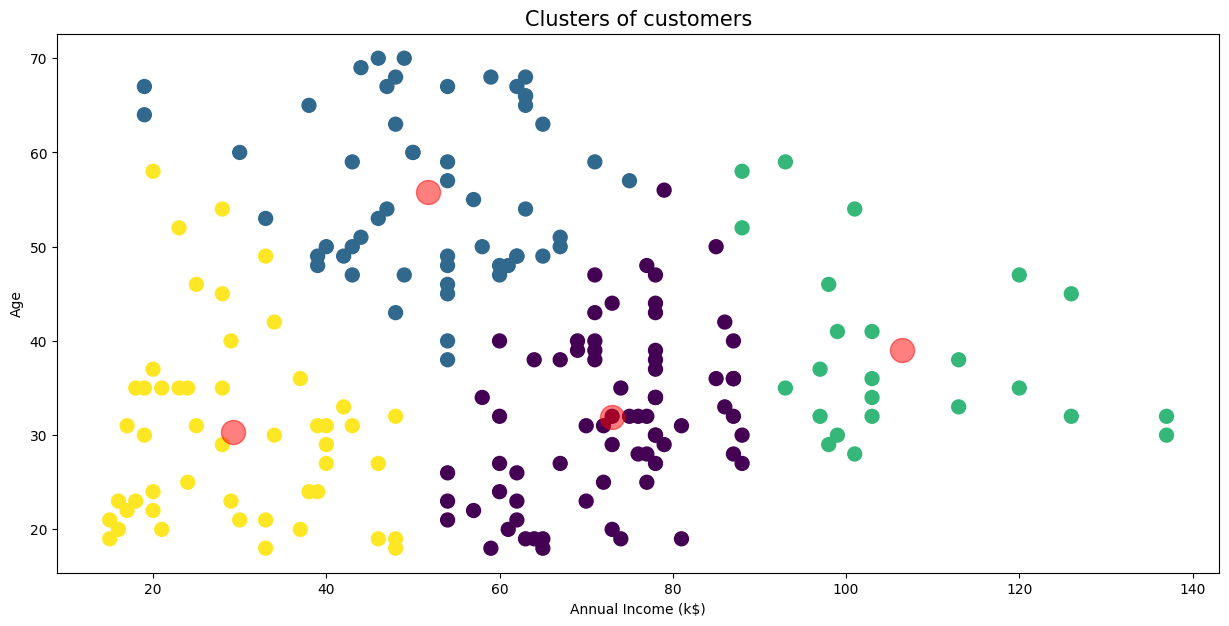

In [ ]:
plt.figure(1 , figsize = (15 , 7))
plt.scatter(x = 'Annual Income (k$)', y = 'Age', data = df, s = 100, c = algorithm.labels_)
plt.scatter(x = centroids[: , 0], y = centroids[: , 1], s = 300, c = 'red', alpha = 0.5)

#plt.scatter(x = new_point[: , 0], y = new_point[: , 1], s = 300, c = 'blue', alpha = 0.5)


plt.title('Clusters of customers', fontsize = 15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()